In [1]:
import os
import pandas as pd
import cv2
import numpy as np
from google.colab import drive
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
# Montar o Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
# Exemplo de aplicação de pré-processamento a uma imagem
def preprocess_image(imagem, resize=True, W=100, L=100):
    # Aqui, você pode realizar qualquer pré-processamento adicional necessário para a imagem
    imagens_preprocessadas = tf.cast(imagem, tf.float32)

    if resize:
      # Expand dimensions to make it 3D
      imagens_preprocessadas = tf.expand_dims(imagens_preprocessadas, axis=2)

      # Resize the image
      imagens_preprocessadas = tf.image.resize(imagens_preprocessadas, [W, L])

      # Reshape the image to (28, 28, 1) to make it compatible with Conv2D input shape
      imagens_preprocessadas = tf.reshape(imagens_preprocessadas, [W, L, 1])

      # Remove the extra dimension added by tf.expand_dims
      imagens_preprocessadas = tf.squeeze(imagens_preprocessadas, axis=-1)  # Squeeze the last dimension

    return imagens_preprocessadas

In [21]:
# Caminhos para os diretórios
caminho_csv = "/content/drive/MyDrive/Colab LFUI/Colab Notebooks/data set/data_18_12_23/CSV"
caminho_imagens = "/content/drive/MyDrive/Colab LFUI/Colab Notebooks/Alex_dataset"

# Listar arquivos CSV
arquivos_csv = [arq for arq in os.listdir(caminho_csv) if arq.endswith('.csv')]
tamanho_do_set = len(arquivos_csv)
print(f'O tamanho do arquivos_csv é: {tamanho_do_set}', end='\n\n')

# Listar arquivos PNG
arquivos_png = [arq for arq in os.listdir(caminho_imagens) if arq.endswith('.png')]
tamanho_do_set = len(arquivos_png)
print(f'O tamanho do arquivos_png é: {tamanho_do_set}', end='\n\n')

# Extrair timestamps dos arquivos CSV
timestamps_csv = set([arquivo_csv.split('_')[3].split('.')[0] for arquivo_csv in arquivos_csv])
tamanho_do_set = len(timestamps_csv)
print(f'O tamanho do timestamps_csv é: {tamanho_do_set}', end='\n\n')

# Extrair timestamps dos arquivos PNG
timestamps_png = set([arquivo_png.split('_')[3].split('.')[0] for arquivo_png in arquivos_png])
tamanho_do_set = len(timestamps_png)
print(f'O tamanho do timestamps_png é: {tamanho_do_set}', end='\n\n')

# Exibir timestamps únicos de cada lista
print("Timestamps únicos CSV:")
print(timestamps_csv)

print("\nTimestamps únicos PNG:")
print(timestamps_png)

# Verificar se há correspondência de timestamps entre os arquivos CSV e PNG
correspondencia_timestamp = timestamps_csv.intersection(timestamps_png)
print(f"\nCorrespondência de timestamps:")
print(correspondencia_timestamp, end='\n\n')
tamanho_do_set = len(correspondencia_timestamp)
print(f'O tamanho do correspondencia_timestamp é: {tamanho_do_set}')

O tamanho do arquivos_csv é: 506

O tamanho do arquivos_png é: 506

O tamanho do timestamps_csv é: 506

O tamanho do timestamps_png é: 506

Timestamps únicos CSV:
{'153453', '154033', '152852', '152752', '152946', '153513', '153510', '153024', '153438', '152215', '154405', '153444', '153103', '153018', '150508', '152550', '153441', '152411', '152306', '153311', '154348', '153118', '152121', '152057', '153921', '152934', '152429', '153745', '153630', '153504', '153957', '152643', '152907', '154130', '152408', '152203', '152734', '154103', '152045', '153519', '152646', '152559', '152532', '153733', '154257', '152347', '154403', '152605', '154009', '152239', '154442', '153607', '154300', '152221', '152300', '153317', '153525', '152546', '154127', '153642', '153220', '153648', '154148', '153142', '153356', '152701', '152743', '150505', '152456', '152622', '152619', '153127', '153000', '153335', '152731', '153730', '152916', '153645', '154206', '154456', '154218', '152115', '152303', '15360

In [64]:
# Criar um dicionário para armazenar os elementos correspondentes
dados_por_timestamp = {}
scaler = StandardScaler()

# Iterar sobre os arquivos CSV
for arquivo_csv in arquivos_csv:
    timestamp = arquivo_csv.split('_')[3].split('.')[0]
    caminho_completo_csv = os.path.join(caminho_csv, arquivo_csv)

    # Ler o conteúdo do arquivo CSV e extrair os 3 valores relevantes
    with open(caminho_completo_csv, 'r') as f_csv:
        conteudo_csv = f_csv.read()
        valores_zernike = np.array([round(float(valor), 1) for valor in conteudo_csv.split(',')[3:6]])

    # Verificar se o timestamp já existe no dicionário
    if timestamp not in dados_por_timestamp:
        dados_por_timestamp[timestamp] = {'zernike': valores_zernike}
    else:
        dados_por_timestamp[timestamp]['zernike'] = valores_zernike

# Iterar sobre os arquivos PNG
for arquivo_png in arquivos_png:
    timestamp = arquivo_png.split('_')[3].split('.')[0]
    caminho_completo_png = os.path.join(caminho_imagens, arquivo_png)

    # Ler a imagem PNG e realizar qualquer pré-processamento necessário
    imagem = cv2.imread(caminho_completo_png, cv2.IMREAD_GRAYSCALE)  # Carregar imagem em escala de cinza (se necessário)

    imagens_preprocessadas = preprocess_image(imagem)

    # Verificar se o timestamp já existe no dicionário
    if timestamp not in dados_por_timestamp:
        dados_por_timestamp[timestamp] = {'imagem': imagens_preprocessadas}
    else:
        dados_por_timestamp[timestamp]['imagem'] = imagens_preprocessadas

# Agora, 'dados_por_timestamp' contém os elementos correspondentes agrupados pelo timestamp
# Estruture esses dados conforme necessário para treinar sua rede neural

# Exemplo de como acessar os dados para um timestamp específico
timestamp_exemplo = '154453'
dados_exemplo = dados_por_timestamp[timestamp_exemplo]
print(f'Dados para o timestamp {timestamp_exemplo}: {dados_exemplo}')

Dados para o timestamp 154453: {'zernike': array([-0.1,  0.7,  0.1]), 'imagem': <tf.Tensor: shape=(100, 100), dtype=float32, numpy=
array([[ 1.4533   ,  2.31     ,  2.3135004, ...,  1.2465017,  1.2001007,
         1.769989 ],
       [ 2.6998   ,  2.0403001,  1.1499996, ...,  1.1304947,  1.1300001,
         1.1000986],
       [ 2.       ,  1.6895001,  1.0674998, ...,  1.1499939,  1.5500002,
         1.4234941],
       ...,
       [41.395084 , 27.13695  , 25.114985 , ...,  4.549988 ,  5.031504 ,
         3.230011 ],
       [38.650143 , 29.540941 , 20.698978 , ...,  4.130496 ,  4.       ,
         3.0298991],
       [33.       , 25.8107   , 18.625021 , ...,  4.149994 ,  3.7102108,
         3.       ]], dtype=float32)>}


In [65]:
# Lista de timestamps no conjunto de dados
timestamps = list(dados_por_timestamp.keys())
rotulos = np.array([dados_por_timestamp[timestamp]['zernike'] for timestamp in timestamps])
imagens = np.array([dados_por_timestamp[timestamp]['imagem'] for timestamp in timestamps])

# Divisão dos timestamps em treinamento, validação e teste
timestamps_treino, timestamps_teste = train_test_split(timestamps, test_size=0.2, random_state=42)
timestamps_validacao, timestamps_teste = train_test_split(timestamps_teste, test_size=0.5, random_state=42)

# Função para extrair os dados correspondentes a um conjunto de timestamps
def obter_dados_por_timestamps(conjunto_timestamps):
    return {timestamp: dados_por_timestamp[timestamp] for timestamp in conjunto_timestamps}

# Obter dados para conjuntos de treinamento, validação e teste
dados_treino = obter_dados_por_timestamps(timestamps_treino)
dados_validacao = obter_dados_por_timestamps(timestamps_validacao)
dados_teste = obter_dados_por_timestamps(timestamps_teste)

In [66]:
print("Conjunto de Treinamento:")
print("Número de timestamps:", len(timestamps_treino))
print("Exemplo de timestamp:", timestamps_treino[0])
print("Exemplo de dados associados:", dados_treino[timestamps_treino[0]])

print("\nConjunto de Validação:")
print("Número de timestamps:", len(timestamps_validacao))
print("Exemplo de timestamp:", timestamps_validacao[0])
print("Exemplo de dados associados:", dados_validacao[timestamps_validacao[0]])

print("\nConjunto de Teste:")
print("Número de timestamps:", len(timestamps_teste))
print("Exemplo de timestamp:", timestamps_teste[0])
print("Exemplo de dados associados:", dados_teste[timestamps_teste[0]])

Conjunto de Treinamento:
Número de timestamps: 404
Exemplo de timestamp: 154357
Exemplo de dados associados: {'zernike': array([-0.1,  0.4,  0.9]), 'imagem': <tf.Tensor: shape=(100, 100), dtype=float32, numpy=
array([[ 1.3933   ,  1.7301999,  2.6035004, ..., 14.130495 , 17.8898   ,
        18.94001  ],
       [ 1.6997999,  1.6003   ,  1.8695004, ..., 17.110006 , 17.969696 ,
        21.340504 ],
       [ 1.23     ,  2.       ,  1.       , ..., 17.305014 , 20.659002 ,
        21.203505 ],
       ...,
       [ 1.1264971,  1.7910045,  1.4650085, ...,  1.9175051,  2.1395028,
         1.6800232],
       [ 1.330092 ,  1.31     ,  1.1104913, ...,  1.7590117,  1.3593943,
         1.7296965],
       [ 1.066702 ,  1.       ,  1.603493 , ...,  1.7534909,  2.       ,
         2.0667052]], dtype=float32)>}

Conjunto de Validação:
Número de timestamps: 51
Exemplo de timestamp: 150505
Exemplo de dados associados: {'zernike': array([-0.4,  0.1,  0.9]), 'imagem': <tf.Tensor: shape=(100, 100), dtype=floa

In [79]:
# Função para criar um tensor a partir dos dados
def criar_tensor(dados_por_timestamp):
    timestamps = list(dados_por_timestamp.keys())
    rotulos = np.array([dados_por_timestamp[timestamp]['zernike'] for timestamp in timestamps])
    imagens = np.array([dados_por_timestamp[timestamp]['imagem'] for timestamp in timestamps])

    return tf.data.Dataset.from_tensor_slices((imagens, rotulos))

# Criar conjuntos de treinamento, validação e teste
conjunto_treino = criar_tensor(dados_treino)
conjunto_validacao = criar_tensor(dados_validacao)
conjunto_teste = criar_tensor(dados_teste)

# Embaralhar e agrupar os conjuntos
BATCH_SIZE = 32
conjunto_treino = conjunto_treino.shuffle(len(dados_treino)).batch(BATCH_SIZE)
conjunto_validacao = conjunto_validacao.batch(BATCH_SIZE)
conjunto_teste = conjunto_teste.batch(BATCH_SIZE)

In [80]:
# Visualizar alguns exemplos do conjunto de treinamento
for imagem, rotulo in conjunto_treino.take(5):
    print(f"Rotulo: {rotulo.numpy()}")
    print(f"Shape da Imagem: {imagem.shape}")
    print("Valores da Imagem:")
    print(imagem.numpy())
    print("\n" + "="*30 + "\n")

Rotulo: [[-0.3  0.5 -0.2]
 [-0.1 -0.5  0.6]
 [-0.4  0.6 -0.1]
 [ 0.2  0.1  0.2]
 [-0.8 -1.  -0.2]
 [ 0.9 -0.  -0. ]
 [-0.6  0.8  0.4]
 [-0.2 -0.6 -0.7]
 [-0.8 -0.   0.9]
 [-0.3  0.2 -0.8]
 [ 0.5  0.8  1. ]
 [ 0.9 -0.   0.6]
 [-0.4  0.4  0.1]
 [-0.3 -0.6 -0. ]
 [ 0.   0.3 -0.4]
 [ 0.9 -0.1 -0.5]
 [ 0.9 -0.6 -0.5]
 [-0.2  1.  -0.4]
 [ 0.6  1.  -0.9]
 [-0.8 -0.   0.7]
 [-0.9  0.1  0.8]
 [ 0.9  0.5  0.5]
 [-0.6 -0.5  0.6]
 [ 0.8  0.6  0.5]
 [-1.  -0.9  0.3]
 [-0.5  0.2 -1. ]
 [-0.7 -0.6  0.8]
 [-0.2  0.2 -0.1]
 [-0.1 -0.5  0.5]
 [ 0.5  0.1 -0.6]
 [ 0.2 -0.5  0.3]
 [-0.4 -0.8  0.9]]
Shape da Imagem: (32, 100, 100)
Valores da Imagem:
[[[ 1.23        1.4899001   1.2465     ...  1.6470026   1.7799017
    1.8366922 ]
  [ 1.1001      1.3594      1.8695004  ...  1.          1.0897003
    1.1000986 ]
  [ 1.1035      1.3104999   1.5350002  ...  1.4675035   1.4499998
    1.1035049 ]
  ...
  [39.34153    32.407433   25.582535   ...  3.          3.5189955
    2.8964922 ]
  [36.10136    30.63088    24.

In [81]:
# Defina a arquitetura da sua rede neural
def criar_modelo():
    modelo = models.Sequential()

    # Adicione camadas convolucionais e de pooling
    modelo.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)))
    modelo.add(layers.MaxPooling2D((2, 2)))
    modelo.add(layers.Conv2D(64, (3, 3), activation='relu'))
    modelo.add(layers.MaxPooling2D((2, 2)))
    modelo.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # Adicione camadas densas
    modelo.add(layers.Flatten())
    modelo.add(layers.Dense(64, activation='relu'))

    # Adicione a camada de saída com 3 neurônios (um para cada coeficiente Zernike)
    modelo.add(layers.Dense(3))

    return modelo

# Crie uma instância do modelo
modelo = criar_modelo()

# Compile o modelo
modelo.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'accuracy'])

# Exiba um resumo da arquitetura do modelo
modelo.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 23, 23, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 21, 21, 64)        36928     
                                                                 
 flatten_10 (Flatten)        (None, 28224)           

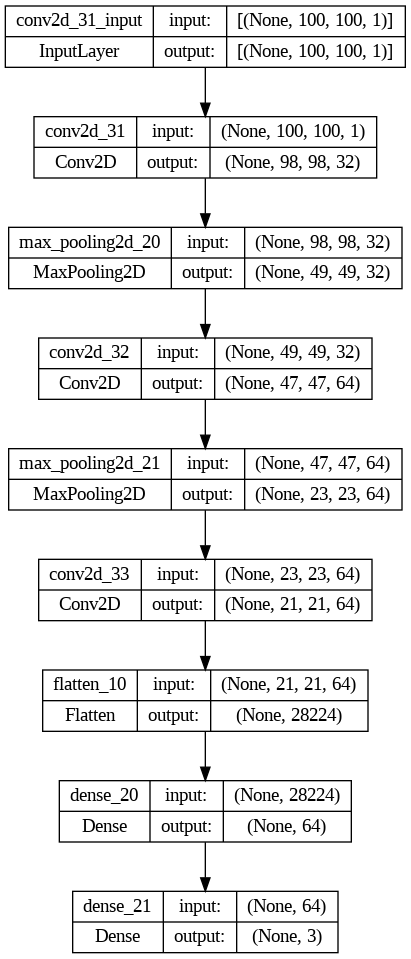

In [82]:
tf.keras.utils.plot_model(
 modelo,
 to_file='model_plot_CNN.png',
 show_shapes=True,
 show_layer_names=True,
 rankdir='TB',
 expand_nested=True,
 dpi=96,
)

In [84]:
# Treinamento do modelo
historico_treino = modelo.fit(
    conjunto_treino,
    epochs=20,  # Ajuste o número de épocas conforme necessário
    validation_data=conjunto_validacao
)

# Avaliação do modelo
resultado_avaliacao = modelo.evaluate(conjunto_teste)
print(f'Avaliação do modelo nos dados de teste: {resultado_avaliacao}')

Epoch 1/20
13/13 [==============================] - 7s 497ms/step - loss: 0.0230 - mae: 0.1161 - accuracy: 0.8812 - val_loss: 0.0349 - val_mae: 0.1439 - val_accuracy: 0.9216
Epoch 2/20
13/13 [==============================] - 8s 640ms/step - loss: 0.0215 - mae: 0.1122 - accuracy: 0.8713 - val_loss: 0.0303 - val_mae: 0.1360 - val_accuracy: 0.8824
Epoch 3/20
13/13 [==============================] - 8s 624ms/step - loss: 0.0173 - mae: 0.1025 - accuracy: 0.8861 - val_loss: 0.0276 - val_mae: 0.1306 - val_accuracy: 0.9216
Epoch 4/20
13/13 [==============================] - 6s 444ms/step - loss: 0.0146 - mae: 0.0953 - accuracy: 0.9059 - val_loss: 0.0261 - val_mae: 0.1282 - val_accuracy: 0.9020
Epoch 5/20
13/13 [==============================] - 8s 622ms/step - loss: 0.0120 - mae: 0.0851 - accuracy: 0.9084 - val_loss: 0.0265 - val_mae: 0.1253 - val_accuracy: 0.9216
Epoch 6/20
13/13 [==============================] - 6s 436ms/step - loss: 0.0112 - mae: 0.0832 - accuracy: 0.9084 - val_loss: 0.02

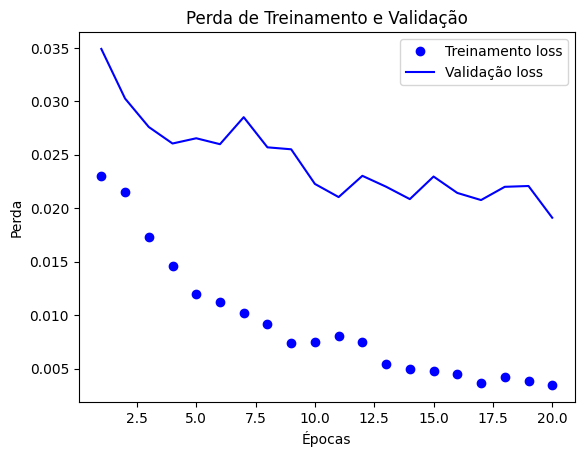

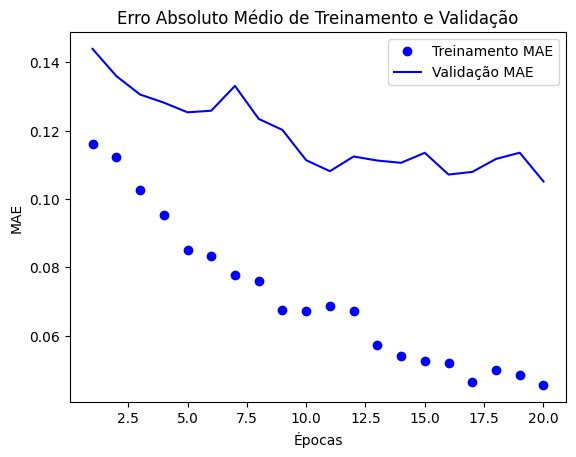

In [85]:
# Extrair os resultados do histórico de treinamento
loss = historico_treino.history['loss']
mae = historico_treino.history['mae']
val_loss = historico_treino.history['val_loss']
val_mae = historico_treino.history['val_mae']

# Número de épocas
epocas = range(1, len(loss) + 1)

# Plotar a perda
plt.plot(epocas, loss, 'bo', label='Treinamento loss')
plt.plot(epocas, val_loss, 'b', label='Validação loss')
plt.title('Perda de Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()

# Plotar o MAE
plt.plot(epocas, mae, 'bo', label='Treinamento MAE')
plt.plot(epocas, val_mae, 'b', label='Validação MAE')
plt.title('Erro Absoluto Médio de Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()
plt.show()

2/2 [==============================] - 0s 130ms/step - loss: 0.0237 - mae: 0.1123 - accuracy: 0.8235


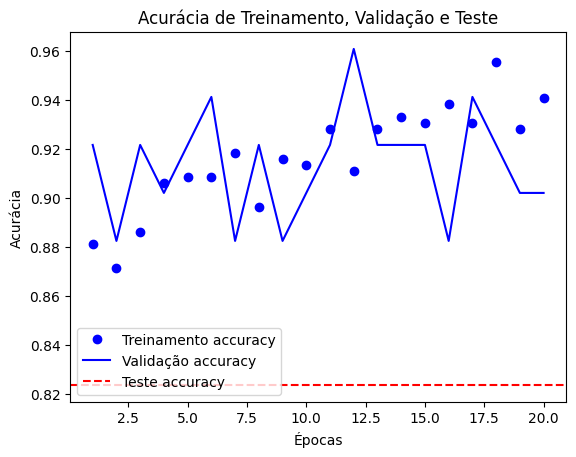

In [86]:
# Extrair a acurácia do histórico de treinamento
accuracy = historico_treino.history['accuracy']
val_accuracy = historico_treino.history['val_accuracy']

# Avaliação do modelo nos dados de teste
resultado_teste = modelo.evaluate(conjunto_teste)

# Extrair a acurácia do resultado de teste
accuracy_teste = resultado_teste[2]  # A posição 2 corresponde à acurácia, ajuste conforme necessário

# Número de épocas
epocas = range(1, len(accuracy) + 1)

# Plotar a acurácia
plt.plot(epocas, accuracy, 'bo', label='Treinamento accuracy')
plt.plot(epocas, val_accuracy, 'b', label='Validação accuracy')
plt.axhline(y=accuracy_teste, color='r', linestyle='--', label='Teste accuracy')  # Adicionar linha para a acurácia do teste
plt.title('Acurácia de Treinamento, Validação e Teste')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()